In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install convokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of matplotlib to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip uninstall -y scipy scikit-learn
!pip install --no-binary scipy scikit-learn

Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 MB 10.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 41.4 MB/s eta 0:00:00
  Created wheel for scipy: filename=scipy-1.14.1-cp310-cp310-linux_x86_64.whl size=27859625 sha256=4608463b8e9f9e61530554696495512d9b953c0ff32d3afbb6945ee600a855a6
  Stored in directory: /root/.cache/pip/wheels/19/01/9c/5b1be6a10b96292fa0dc6d6efcdc982eb15edd22a34f9fc517
Successfully built scipy
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the s

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import convokit
from convokit import Corpus, download, FightingWords


/usr/local/lib/python3.10/dist-packages/numpy/_core/_dtype.py:106: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if dtype.type == np.bool:


TypeError: 

In [ ]:
from tqdm import tqdm
tqdm.pandas()

In [ ]:
def get_corpus(sample_df):
    # Sample DataFrame
    data = {
        'subject_id': [1, 2, 3],
        'race': ['A', 'B', 'A'],
        'gender': ['M', 'F', 'M'],
        'note_type': ['type1', 'type2', 'type1'],
        'note_id': [101, 102, 103],
        'note_seq': [1, 1, 2],
        'charttime': ['2022-01-01', '2022-01-02', '2022-01-03'],
        'storetime': ['2022-01-01T12:00', '2022-01-02T12:00', '2022-01-03T12:00'],
        'text': ['Note 1', 'Note 2', 'Note 3']
    }

    df = sample_df

    # Add required columns and use the index as 'id'
    df['id'] = df['note_id'].astype(str)   # Convert index to string for ConvoKit 'id'
    df['speaker'] = df['subject_id'].astype(str)  # Speaker identifier
    df['conversation_id'] = df.index.astype(str)  # Conversation ID based on note sequence
    df['reply_to'] = None   # Assuming no replies, set to None
    df['timestamp'] = pd.to_datetime(df['charttime'])  # Use 'charttime' as timestamp

    # Add race and gender as metadata fields for each utterance
    df['meta.race'] = df['race']
    df['meta.gender'] = df['gender']
    df['meta.type'] = "original"

    # Construct the utterances DataFrame with metadata columns
    utterances_df = df[['id', 'timestamp', 'text', 'speaker', 'reply_to', 'conversation_id', 'meta.race', 'meta.gender', 'meta.type']]

    # Create the ConvoKit corpus with both utterances and speaker data
    corpus = Corpus.from_pandas(utterances_df=utterances_df)
    return corpus

def get_corpus_generated(sample_df, generate_df):
    # Sample DataFrame
    data = {
        'subject_id': [1, 2, 3],
        'race': ['A', 'B', 'A'],
        'gender': ['M', 'F', 'M'],
        'text': ['Note 1', 'Note 2', 'Note 3']
    }

    df = generate_df

    # Add required columns and use the index as 'id'
    df['id'] = df.index.astype(str)
    df['speaker'] = df['subject_id'].astype(str)  # Speaker identifier
    df['conversation_id'] = (df.index + 10000).astype(str)
    df['reply_to'] = None
    df['timestamp'] = pd.to_datetime('2024-01-01 00:00:00')

    # Add race and gender as metadata fields for each utterance
    df['meta.race'] = df['race']
    df['meta.gender'] = df['gender']
    df['meta.type'] = "generated"

    # Construct the utterances DataFrame with metadata columns
    utterances_df0 = df[['id', 'timestamp', 'text', 'speaker', 'reply_to', 'conversation_id', 'meta.race', 'meta.gender', 'meta.type']]

    df = sample_df

    # Add required columns and use the index as 'id'
    df['id'] = df['note_id'].astype(str)   # Convert index to string for ConvoKit 'id'
    df['speaker'] = df['subject_id'].astype(str)  # Speaker identifier
    df['conversation_id'] = df.index.astype(str)  # Conversation ID based on note sequence
    df['reply_to'] = None   # Assuming no replies, set to None
    df['timestamp'] = pd.to_datetime(df['charttime'])  # Use 'charttime' as timestamp

    # Add race and gender as metadata fields for each utterance
    df['meta.race'] = df['race']
    df['meta.gender'] = df['gender']
    df['meta.type'] = "original"

    # Construct the utterances DataFrame with metadata columns
    utterances_df1 = df[['id', 'timestamp', 'text', 'speaker', 'reply_to', 'conversation_id', 'meta.race', 'meta.gender', 'meta.type']]

    utterances_df = pd.concat([utterances_df0, utterances_df1])

    # Create the ConvoKit corpus with both utterances and speaker data
    corpus = Corpus.from_pandas(utterances_df=utterances_df)
    return corpus


# Function to extract section content
def extract_section(pattern, text):
    match = re.search(pattern, text)
    if match:
        return match.group(1).strip()
    else:
        return ""

def clean_text(text, stemm=False):
    # Tokenize text into words
    tokens = nltk.word_tokenize(text)

    # Convert tokens to lowercase
    tokens = [token.lower() for token in tokens]

    # Remove punctuation
    tokens = [token.translate(str.maketrans('', '', string.punctuation)) for token in tokens]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Filter out tokens that contain numbers
    tokens = [token for token in tokens if not any(char.isdigit() for char in token)]

    # # Apply stemming (optional)
    if stemm:
      stemmer = PorterStemmer()
      tokens = [stemmer.stem(token) for token in tokens]

    # Remove empty tokens
    tokens = [token for token in tokens if token]

    return tokens

def sep_sections(text):
    sections = {
        "Chief Complaint": None,
        "History of Present Illness": None,
        "Family History": None,
        "Brief Hospital Course": None,
        "Transitional Issues": None,
        "Discharge Instructions": None,
        "Followup Instructions": None,
        "Vore": None  # Assuming "Vore" refers to a specific section that may be present
    }
    patterns = {
      "Chief Complaint": r"(?smi)^\s*Chief Complaint(?::)?\n(.*?)^\s*Major Surgical or Invasive Procedure",
      "History of Present Illness": r"(?smi)^\s*History of Present Illness(?::)?\n(.*?)^\s*Past Medical History",
      "Family History": r"(?smi)^\s*Family History(?::)?\n(.*?)^\s*Physical Exam",
      "Brief Hospital Course": r"(?smi)^\s*Brief Hospital Course(?::)?\n(.*?)^\s*TRANSITIONAL ISSUES",
      "Transitional Issues": r"(?smi)^\s*TRANSITIONAL ISSUES(?::)?\n(.*?)^\s*Medications on Admission",
      "Discharge Instructions": r"(?smi)^\s*Discharge Instructions(?::)?\n(.*?)^\s*Followup Instructions",
      "Followup Instructions": r"(?smi)^\s*Followup Instructions(?::)?\n(.*)",
    }

    for section, pattern in patterns.items():
        match = re.search(pattern, text, re.DOTALL)
        if match:
            sections[section] = match.group(1).strip()
    return sections


In [ ]:
def sep_instruct(text):
    pattern =  r"(?smi)^\s*Discharge Instructions(?::)?\n(.*?)^\s*Followup Instructions"
    match = re.search(pattern, text, re.DOTALL)
    if match:
        return " ".join(clean_text(match.group(1).strip()))
    return ""

In [ ]:
sample_df = pd.read_csv("/content/drive/MyDrive/CS329R/329RFinalProjectScripts/sample=8k.csv")
old_df = sample_df
sample_df = sample_df.dropna(subset=['text'])
sample_df['text'] = sample_df['text'].progress_apply(sep_instruct)
sample_df = sample_df.dropna(subset=['text'])
sample_df[:2]

100%|██████████| 8286/8286 [00:50<00:00, 165.66it/s]


,Unnamed: 0,subject_id,race,gender,note_id,hadm_id,note_type,note_seq,charttime,storetime,text
0,0,11875773,OTHER,M,11875773-DS-26,29428301,DS,26,2136-01-30 00:00:00,2136-02-03 09:54:00,dear mr pleasure caring came hospital falling ...
1,1,13050816,BLACK/AFRICAN AMERICAN,M,13050816-DS-25,23392087,DS,25,2169-12-24 00:00:00,2169-12-24 16:30:00,mr admitted hospital experiencing chest pain r...


In [ ]:
# sample_df = pd.read_csv("/content/drive/MyDrive/CS329R/329RFinalProjectScripts/sample=6k.csv")
# old_df = sample_df
# sample_df = sample_df.dropna(subset=['text'])
# sample_df['text'] = sample_df['text'].apply(lambda x: " ".join([
#     token
#     for section in [sep_sections(x)["Discharge Instructions"]]  # Create a list to ensure iteration
#     if section is not None
#     for token in clean_text(section) if section is not None # Handle None values within clean_text
# ]))
# sample_df = sample_df.dropna(subset=['text'])

In [ ]:
generate_df = pd.read_csv("/content/drive/MyDrive/CS329R/329RFinalProjectScripts/generated_sample.csv")
generate_df['text'] = generate_df['text'].progress_apply(lambda x: " ".join(clean_text(x)))
generate_df[:2]

In [14]:
print(sample_df.shape[0])
print(generate_df.shape[0])

8286
3330


In [16]:
print(generate_df['race'].unique())

['WHITE' 'BLACKAFRICANAMERICAN' 'HISPANICLATINODOMINICAN' 'ASIANCHINESE'
 'SOUTHAMERICAN' 'OTHER' 'HISPANICLATINOCOLUMBIAN' 'BLACKCARIBBEANISLAND'
 'WHITEOTHEREUROPEAN' 'HISPANICLATINOPUERTORICAN' 'BLACKAFRICAN'
 'WHITEBRAZILIAN' 'BLACKCAPEVERDEAN' 'HISPANICLATINOCUBAN'
 'HISPANICORLATINO' 'PORTUGUESE' 'WHITERUSSIAN' 'HISPANICLATINOSALVADORAN'
 'HISPANICLATINOCENTRALAMERICAN' 'WHITEEASTERNEUROPEAN' 'UNKNOWN' 'ASIAN'
 'HISPANICLATINOHONDURAN' 'ASIANSOUTHEASTASIAN' 'ASIANASIANINDIAN'
 'AMERICANINDIANALASKANATIVE' 'HISPANICLATINOMEXICAN'
 'PATIENTDECLINEDTOANSWER' 'HISPANICLATINOGUATEMALAN' 'ASIANKOREAN'
 'MULTIPLERACEETHNICITY' 'NATIVEHAWAIIANOROTHERPACIFICISLANDER'
 'UNABLETOOBTAIN']


In [17]:
print(sample_df['race'].unique())

['OTHER' 'BLACK/AFRICAN AMERICAN' 'WHITE' 'PORTUGUESE'
 'HISPANIC/LATINO - PUERTO RICAN' 'ASIAN' 'WHITE - OTHER EUROPEAN'
 'WHITE - RUSSIAN' 'HISPANIC/LATINO - CENTRAL AMERICAN'
 'AMERICAN INDIAN/ALASKA NATIVE' 'HISPANIC OR LATINO' 'BLACK/CAPE VERDEAN'
 'BLACK/CARIBBEAN ISLAND' 'ASIAN - CHINESE' 'BLACK/AFRICAN'
 'HISPANIC/LATINO - DOMINICAN' 'WHITE - BRAZILIAN'
 'HISPANIC/LATINO - GUATEMALAN'
 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER' 'HISPANIC/LATINO - HONDURAN'
 'UNKNOWN' 'HISPANIC/LATINO - MEXICAN' 'HISPANIC/LATINO - SALVADORAN'
 'ASIAN - SOUTH EAST ASIAN' 'ASIAN - ASIAN INDIAN'
 'HISPANIC/LATINO - COLUMBIAN' 'HISPANIC/LATINO - CUBAN'
 'WHITE - EASTERN EUROPEAN' 'PATIENT DECLINED TO ANSWER' 'ASIAN - KOREAN'
 'UNABLE TO OBTAIN' 'SOUTH AMERICAN' 'MULTIPLE RACE/ETHNICITY']


In [ ]:
race1 = "WHITE" # WHITE, HISPANIC, BLACK, ASIAN
race2 = "BLACK"

In [ ]:
corpus = get_corpus_generated(sample_df, generate_df)
fw = FightingWords(ngram_range=(1,1))
fw.fit(corpus, class1_func=lambda utt: race1 in utt.meta['race'] and utt.meta['type'] == "generated",
            class2_func=lambda utt: race2 in utt.meta['race'] and utt.meta['type'] == "generated")
df = fw.summarize(corpus, plot=True, class1_name = race1 + " generated", class2_name = race2 + " generated")
# df.to_csv(f"/content/drive/MyDrive/CS329R/329RFinalProjectScripts/Fightin/Gen/{race}.csv", encoding="utf-8")

In [ ]:
df

In [ ]:
race1 = "WHITE"
race2 = "BLACK"

5000it [00:01, 3057.76it/s]


Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 2868 valid corpus components. class2_func returned 1242 valid corpus components.
Vocab size is 2557
Comparing language...
ngram zscores computed.


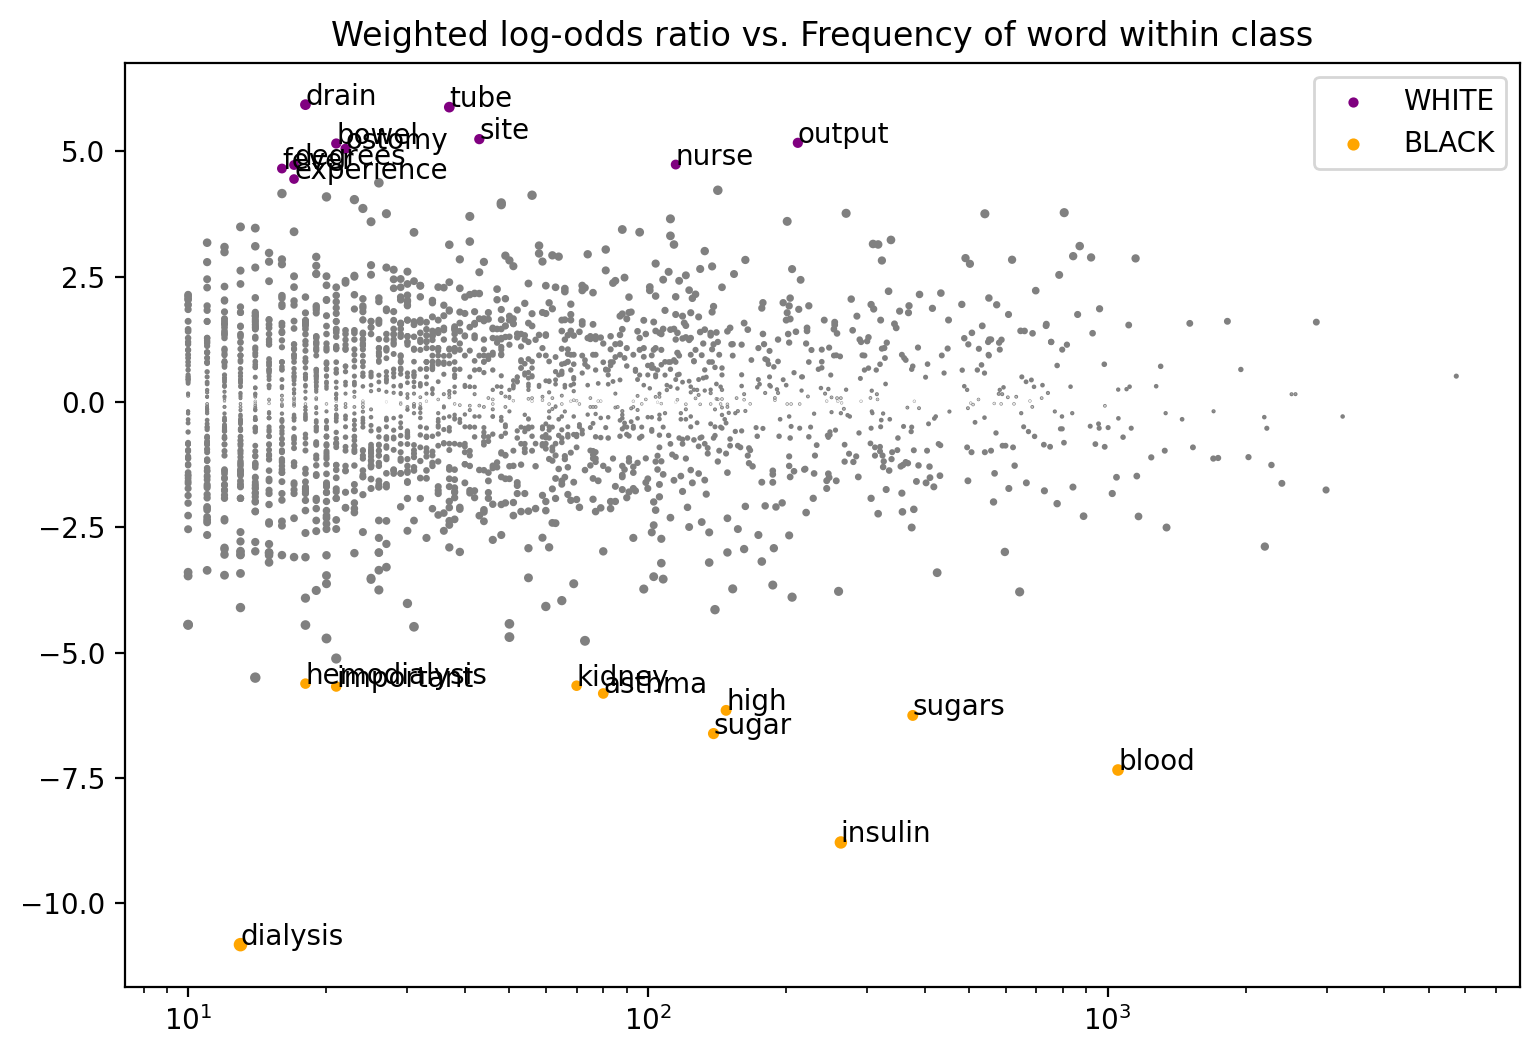

In [ ]:
corpus = get_corpus(sample_df)
fw = FightingWords(ngram_range=(1,1))
fw.fit(corpus, class1_func=lambda utt: race1 in utt.meta['race'],
            class2_func=lambda utt: race2 in utt.meta['race'],)
df = fw.summarize(corpus, plot=True, class1_name=race1, class2_name=race2)

In [ ]:
print(f"Top 10 words used by {race1} speakers:")
print(df[df['z-score'] > 1.96].sort_values(by='z-score', ascending=False).head(10))

print(f"Top 10 words used by {race2} speakers:")
print(df[df['z-score'] < -1.96].sort_values(by='z-score', ascending=True).head(10))


Top 10 words used by WHITE speakers:
             z-score  class
ngram                      
drain       5.930766  WHITE
tube        5.881067  WHITE
site        5.242910  WHITE
output      5.169453  WHITE
bowel       5.155940  WHITE
ostomy      5.050999  WHITE
nurse       4.735973  WHITE
degrees     4.727207  WHITE
fever       4.656577  WHITE
experience  4.447029  WHITE
Top 10 words used by BLACK speakers:
                z-score  class
ngram                         
dialysis     -10.825009  BLACK
insulin       -8.786339  BLACK
blood         -7.341130  BLACK
sugar         -6.614439  BLACK
sugars        -6.252633  BLACK
high          -6.151456  BLACK
asthma        -5.814435  BLACK
important     -5.675276  BLACK
kidney        -5.659597  BLACK
hemodialysis  -5.618202  BLACK


In [ ]:
df

,z-score,class
ngram,,
dialysis,-10.825009,BLACK
insulin,-8.786339,BLACK
blood,-7.341130,BLACK
sugar,-6.614439,BLACK
sugars,-6.252633,BLACK
...,...,...
bowel,5.155940,WHITE
output,5.169453,WHITE
site,5.242910,WHITE


In [ ]:
races = ["ASIAN", "BLACK", "WHITE", "HISPANIC"]
word = "dialysis"
for race in races:
  num = 0
  total = 0
  for idx, row in old_df.iterrows():
      if idx % 1000 == 0:
        print(f"Processing row {idx}")
      if race in row["race"]:
        text = sep_sections(row["text"])["Discharge Instructions"]
        if text != None:
            total += 1
            num += 1 if word in clean_text(text) else 0
  print(f"This many entries for {race}: " + str(total))
  print(f"{word} shows up " + str(num) + " times.")
  print(f"{race}: {num/total}")

Processing row 0
Processing row 1000
Processing row 2000
Processing row 3000
Processing row 4000
This many entries for ASIAN: 105
dialysis shows up 10 times.
ASIAN: 0.09523809523809523
Processing row 0
Processing row 1000
Processing row 2000
Processing row 3000
Processing row 4000
This many entries for BLACK: 1276
dialysis shows up 95 times.
BLACK: 0.07445141065830721
Processing row 0
Processing row 1000
Processing row 2000
Processing row 3000
Processing row 4000
This many entries for WHITE: 2916
dialysis shows up 69 times.
WHITE: 0.023662551440329218
Processing row 0
Processing row 1000
Processing row 2000
Processing row 3000
Processing row 4000
This many entries for HISPANIC: 398
dialysis shows up 31 times.
HISPANIC: 0.07788944723618091


In [ ]:
!unzip /content/drive/MyDrive/CS329R/329RFinalProjectScripts/merged_file.csv.zip

Archive:  /content/drive/MyDrive/CS329R/329RFinalProjectScripts/merged_file.csv.zip
  inflating: merged_file.csv         
  inflating: __MACOSX/._merged_file.csv  


In [ ]:
def sep_instruct(text):
    pattern =  r"(?smi)^\s*Discharge Instructions(?::)?\n(.*?)^\s*Followup Instructions"
    match = re.search(pattern, text, re.DOTALL)
    if match:
        return " ".join(clean_text(match.group(1).strip()))
    return ""

In [ ]:
sample_df = pd.read_csv("merged_file.csv")
sample_df.shape[0]

1676830

In [ ]:
from tqdm import tqdm
tqdm.pandas()

In [ ]:
# old_df = sample_df
# sample_df = sample_df.sample(n=100000, random_state = 42)

In [ ]:
old_df = sample_df
sample_df = sample_df.dropna(subset=['text'])
sample_df['text'] = sample_df['text'].progress_apply(sep_instruct)
sample_df = sample_df.dropna(subset=['text'])

100%|██████████| 1676830/1676830 [1:43:09<00:00, 270.89it/s]


In [ ]:
race1 = "WHITE"
race2 = "BLACK"

corpus = get_corpus(sample_df)
fw = FightingWords(ngram_range=(1,1))
fw.fit(corpus, class1_func=lambda utt: race1 in utt.meta['race'],
            class2_func=lambda utt: race2 in utt.meta['race'],)
df = fw.summarize(corpus, plot=True, class1_name=race1, class2_name=race2)

print(f"Top 10 words used by {race1} speakers:")
print(df[df['z-score'] > 1.96].sort_values(by='z-score', ascending=False).head(10))

print(f"Top 10 words used by {race2} speakers:")
print(df[df['z-score'] < -1.96].sort_values(by='z-score', ascending=True).head(10))


In [ ]:
df

,z-score,class
ngram,,
dialysis,-40.074253,BLACK
insulin,-31.040122,BLACK
sugars,-24.356697,BLACK
blood,-23.471859,BLACK
asthma,-23.011303,BLACK
...,...,...
ileostomy,12.403253,WHITE
narcotic,12.698878,WHITE
tube,13.156039,WHITE


In [ ]:
df.to_csv("fightin_100k.csv", index=False, sep=";", encoding="utf-8")